#**Student Performance Factors**

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

##Load the dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


##Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


##Data Cleaning

In [5]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
# Drop null values
df.dropna(inplace=True)
df.reset_index(drop=True)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6374,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6375,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6376,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [7]:
# check duplicated rows
df.duplicated().sum()

np.int64(0)

In [8]:
# Handling the outliers
# Select numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
data_numeric = df[numeric_cols]

# Compute Z-score
z = np.abs((data_numeric - data_numeric.mean()) / data_numeric.std())
threshold = 3

# Keep only rows where all numeric values are within threshold
df_clean = df[(z < threshold).all(axis=1)]

# Check how many rows were removed
print(f"Original rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df_clean.shape[0]}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Update df
df = df_clean
df=df.reset_index(drop=True)

Original rows: 6378
Rows after outlier removal: 6280
Rows removed: 98


##Visualization

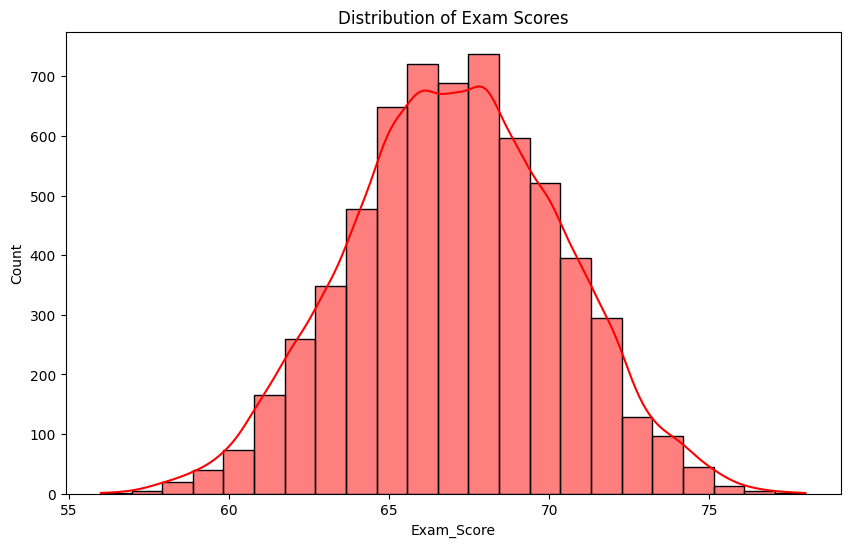

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['Exam_Score'],bins=23,kde=True,color="red")
plt.title("Distribution of Exam Scores")
plt.show()

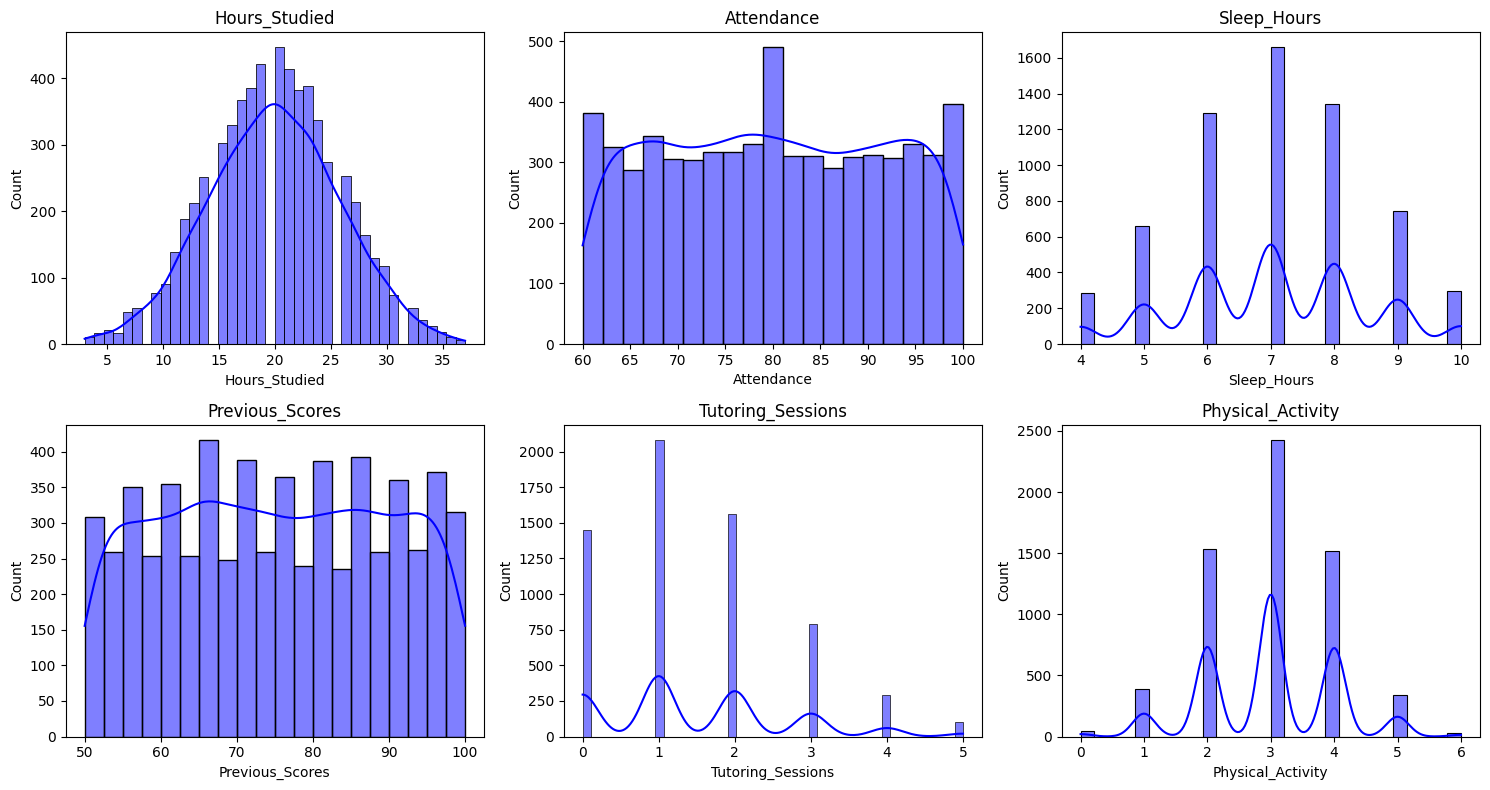

In [10]:
#Distribution of numeric columns
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours','Previous_Scores', 'Tutoring_Sessions','Physical_Activity']
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.histplot(
      df[col],
      kde=True,
      color="blue"
  )
  plt.title(col)
plt.tight_layout()
plt.show()

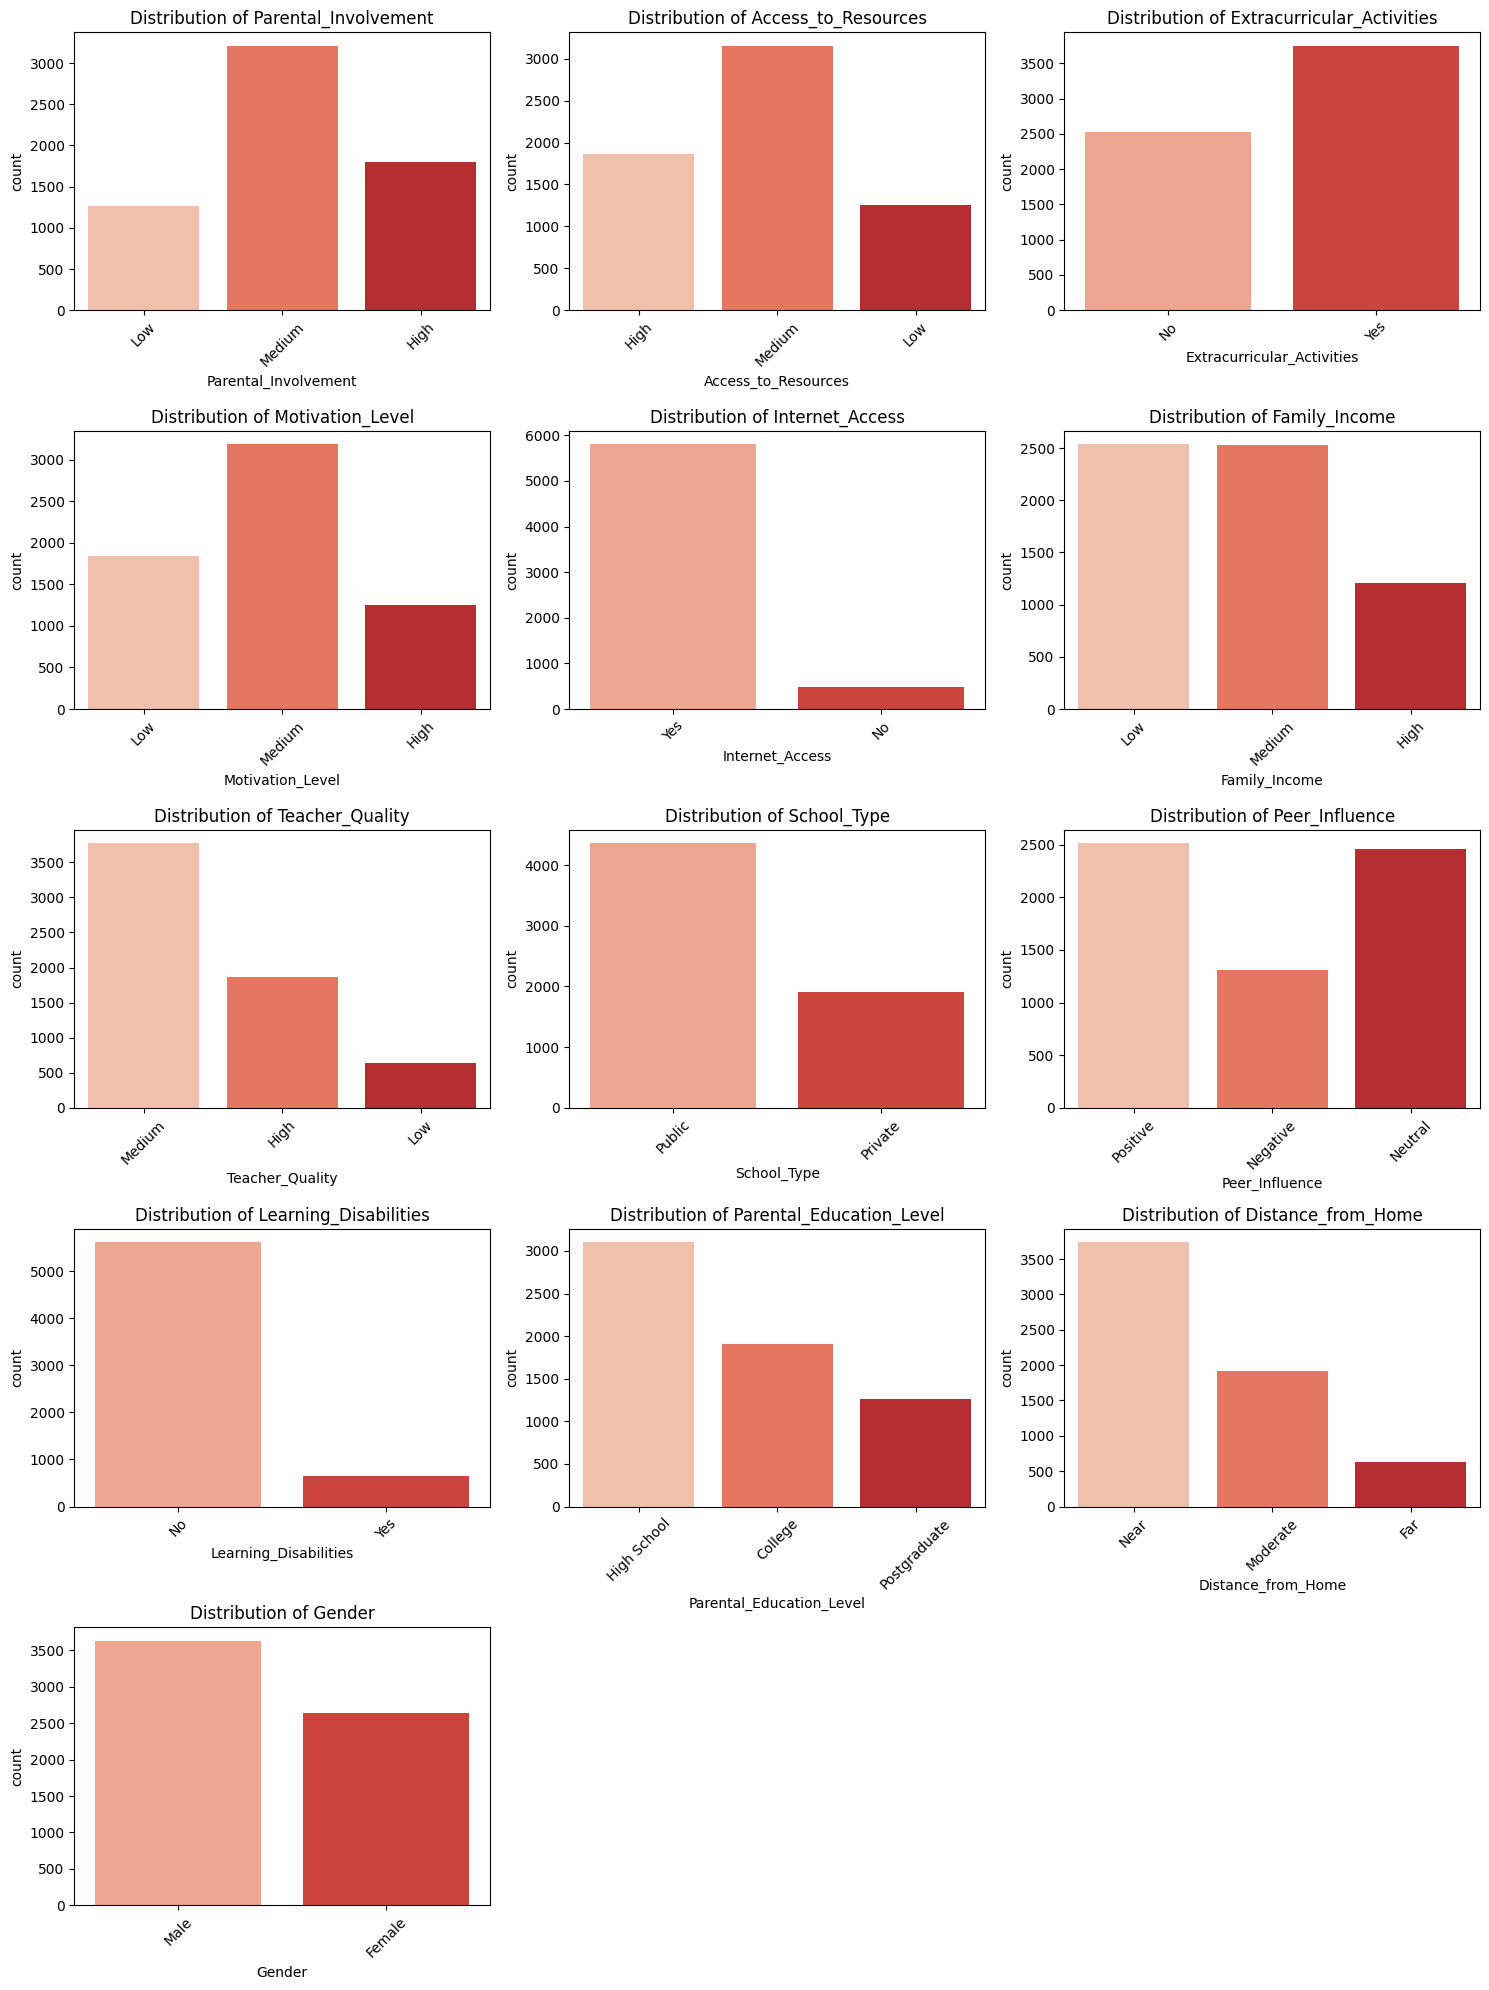

In [11]:
#Barplot of categorical columns
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
                    'Parental_Education_Level', 'Distance_from_Home', 'Gender']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols,1):
  plt.subplot(5,3,i)
  sns.countplot(
                data=df,
                x=col,
                hue=col,
                palette="Reds"
                )
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

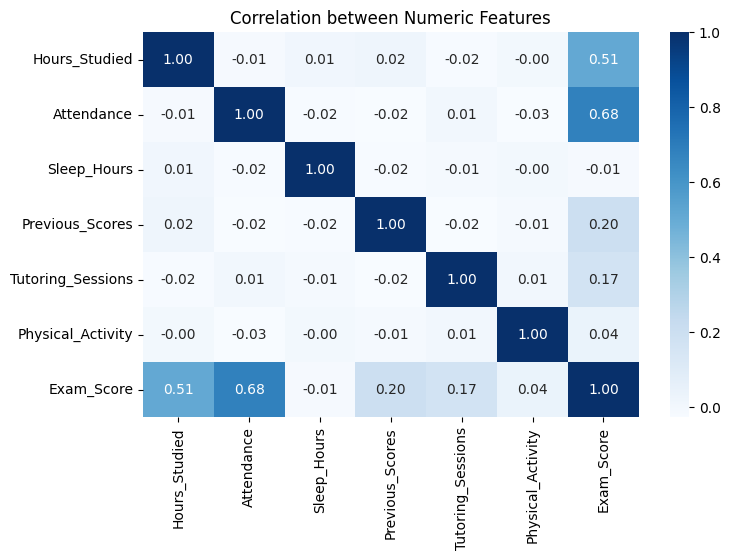

In [12]:
numeric_corr = df.select_dtypes(include=["int64","float64"]).columns
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_corr].corr(),annot=True,fmt=".2f",cmap="Blues")
plt.title("Correlation between Numeric Features")
plt.show()


## Data Preprocessing

Categorical ordinal columns -> OrdinalEncoder

Categorical non-ordinal columns -> OneHotEncoder

Numerical columns -> MinMaxScaler

In [13]:
#Categorical Ordinal Columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")

In [15]:
for i in categorical_cols:
  print(df[i].cat.categories)

Index(['High', 'Low', 'Medium'], dtype='object')
Index(['High', 'Low', 'Medium'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['High', 'Low', 'Medium'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['High', 'Low', 'Medium'], dtype='object')
Index(['High', 'Low', 'Medium'], dtype='object')
Index(['Private', 'Public'], dtype='object')
Index(['Negative', 'Neutral', 'Positive'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['College', 'High School', 'Postgraduate'], dtype='object')
Index(['Far', 'Moderate', 'Near'], dtype='object')
Index(['Female', 'Male'], dtype='object')


In [16]:
ordinal_cols = {
    "Parental_Involvement": ["Low", "Medium", "High"],
    "Access_to_Resources": ["Low", "Medium", "High"],
    "Motivation_Level": ["Low", "Medium", "High"],
    "Family_Income": ["Low", "Medium", "High"],
    "Teacher_Quality": ["Low", "Medium", "High"],
    "Parental_Education_Level": ["High School", "College", "Postgraduate"],
    "Distance_from_Home": ["Near", "Moderate", "Far"]
}

In [17]:
#Before Ordinal Encoder
df[ordinal_cols.keys()]

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,Low,High,Low,Low,Medium,High School,Near
1,Low,Medium,Low,Medium,Medium,College,Moderate
2,Medium,Medium,Medium,Medium,Medium,Postgraduate,Near
3,Low,Medium,Medium,Medium,Medium,High School,Moderate
4,Medium,Medium,Medium,Medium,High,College,Near
...,...,...,...,...,...,...,...
6275,High,Medium,Medium,High,Medium,High School,Near
6276,High,Medium,Medium,Low,High,High School,Near
6277,Medium,Low,Low,Low,Medium,Postgraduate,Near
6278,High,High,High,Low,Medium,High School,Far


In [18]:
# Apply Ordinal Encoding
ordinal = OrdinalEncoder(categories=list(ordinal_cols.values()))
df[list(ordinal_cols.keys())] = ordinal.fit_transform(df[list(ordinal_cols.keys())])

In [19]:
#After Ordinal Encoder
df[ordinal_cols.keys()]

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home
0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,2.0,0.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,1.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...
6275,2.0,1.0,1.0,2.0,1.0,0.0,0.0
6276,2.0,1.0,1.0,0.0,2.0,0.0,0.0
6277,1.0,0.0,0.0,0.0,1.0,2.0,0.0
6278,2.0,2.0,2.0,0.0,1.0,0.0,2.0


In [20]:
onehot_cols = [
    "Extracurricular_Activities",
    "Internet_Access",
    "School_Type",
    "Peer_Influence",
    "Learning_Disabilities",
    "Gender"
]
one_hot_encoder = OneHotEncoder(drop="first",sparse_output=False)
onehot_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(df[onehot_cols]),
    columns=one_hot_encoder.get_feature_names_out(onehot_cols)
)


In [21]:
df = pd.concat([df.drop(columns=onehot_cols), onehot_encoded], axis=1)

In [22]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,0.0,2.0,7,73,0.0,0,0.0,1.0,...,0.0,0.0,67,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,19,64,0.0,1.0,8,59,0.0,2,1.0,1.0,...,1.0,1.0,61,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,24,98,1.0,1.0,7,91,1.0,2,1.0,1.0,...,2.0,0.0,74,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,29,89,0.0,1.0,8,98,1.0,1,1.0,1.0,...,0.0,1.0,71,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,19,92,1.0,1.0,6,65,1.0,3,1.0,2.0,...,1.0,0.0,70,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,25,69,2.0,1.0,7,76,1.0,1,2.0,1.0,...,0.0,0.0,68,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6276,23,76,2.0,1.0,8,81,1.0,3,0.0,2.0,...,0.0,0.0,69,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6277,20,90,1.0,0.0,6,65,0.0,3,0.0,1.0,...,2.0,0.0,68,1.0,1.0,1.0,0.0,0.0,0.0,0.0
6278,10,86,2.0,2.0,6,91,2.0,2,0.0,1.0,...,0.0,2.0,68,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [23]:
numeric_cols = ["Hours_Studied","Attendance","Sleep_Hours","Previous_Scores","Tutoring_Sessions","Physical_Activity"]
minmaxscaler = MinMaxScaler()
numeric_scaled = minmaxscaler.fit_transform(df[numeric_cols])
numeric_scaled = pd.DataFrame(numeric_scaled,columns=numeric_cols,index=df.index)

In [24]:
numeric_scaled

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,0.588235,0.600,0.500000,0.46,0.0,0.500000
1,0.470588,0.100,0.666667,0.18,0.4,0.666667
2,0.617647,0.950,0.500000,0.82,0.4,0.666667
3,0.764706,0.725,0.666667,0.96,0.2,0.666667
4,0.470588,0.800,0.333333,0.30,0.6,0.666667
...,...,...,...,...,...,...
6275,0.647059,0.225,0.500000,0.52,0.2,0.333333
6276,0.588235,0.400,0.666667,0.62,0.6,0.333333
6277,0.500000,0.750,0.333333,0.30,0.6,0.333333
6278,0.205882,0.650,0.333333,0.82,0.4,0.500000


In [25]:
df = pd.concat([df.drop(columns=numeric_cols),numeric_scaled],axis=1)

In [26]:
df

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,67,0.0,1.0,...,0.0,1.0,0.0,1.0,0.588235,0.600,0.500000,0.46,0.0,0.500000
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,61,0.0,1.0,...,0.0,0.0,0.0,0.0,0.470588,0.100,0.666667,0.18,0.4,0.666667
2,1.0,1.0,1.0,1.0,1.0,2.0,0.0,74,1.0,1.0,...,1.0,0.0,0.0,1.0,0.617647,0.950,0.500000,0.82,0.4,0.666667
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,71,1.0,1.0,...,0.0,0.0,0.0,1.0,0.764706,0.725,0.666667,0.96,0.2,0.666667
4,1.0,1.0,1.0,1.0,2.0,1.0,0.0,70,1.0,1.0,...,1.0,0.0,0.0,0.0,0.470588,0.800,0.333333,0.30,0.6,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,2.0,1.0,1.0,2.0,1.0,0.0,0.0,68,0.0,1.0,...,0.0,1.0,0.0,0.0,0.647059,0.225,0.500000,0.52,0.2,0.333333
6276,2.0,1.0,1.0,0.0,2.0,0.0,0.0,69,0.0,1.0,...,0.0,1.0,0.0,0.0,0.588235,0.400,0.666667,0.62,0.6,0.333333
6277,1.0,0.0,0.0,0.0,1.0,2.0,0.0,68,1.0,1.0,...,0.0,0.0,0.0,0.0,0.500000,0.750,0.333333,0.30,0.6,0.333333
6278,2.0,2.0,2.0,0.0,1.0,0.0,2.0,68,1.0,1.0,...,0.0,1.0,0.0,0.0,0.205882,0.650,0.333333,0.82,0.4,0.500000


##Modeling

In [27]:
#Spliting the Data
X = df.drop(["Exam_Score"],axis=1)
y = df["Exam_Score"]
X_train , X_test , y_train ,  y_test = train_test_split(X,y,random_state=22,test_size=0.2,shuffle=True)

In [28]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = LR.predict(X_test)

In [30]:
print("train",LR.score(X_train,y_train))
print("test",LR.score(X_test,y_test))

train 0.9867741511589823
test 0.9904464469201564


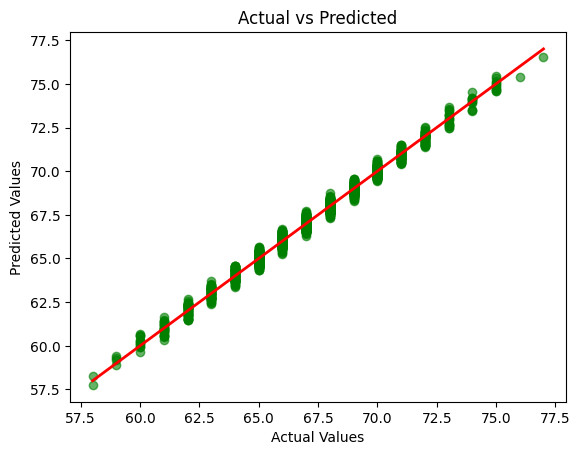

In [31]:
# Assume you already have y_test and y_pred
plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)  # 45° line (perfect prediction)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [32]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE:",round(mse,3))
print("MAE:",round(mae,3))
print("R2:",round(r2,3))

MSE: 0.095
MAE: 0.259
R2: 0.99


In [33]:
#Polynomial regression
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [34]:
PR = LinearRegression()
PR.fit(X_train_poly,y_train)

LinearRegression()

In [35]:
y_pred_poly = PR.predict(X_test_poly)

In [36]:
print("train",PR.score(X_train_poly,y_train))
print("test",PR.score(X_test_poly,y_test))

train 0.9872061619841705
test 0.9899764106976469


In [37]:
mse_p = mean_squared_error(y_test,y_pred_poly)
mae_p = mean_absolute_error(y_test,y_pred_poly)
r2_p = r2_score(y_test,y_pred_poly)
print("MSE:",round(mse_p,3))
print("MAE:",round(mae_p,3))
print("R2:",round(r2_p,3))

MSE: 0.1
MAE: 0.264
R2: 0.99


##Conclusion

In [38]:
print("Linear Regression Model")
print("MSE:",round(mse,3))
print("MAE:",round(mae,3))
print("R2:",round(r2,3))
print("-----------------------------------")
print("Polynomial Regression Model (2 degree)")
print("MSE:",round(mse_p,3))
print("MAE:",round(mae_p,3))
print("R2:",round(r2_p,3))


Linear Regression Model
MSE: 0.095
MAE: 0.259
R2: 0.99
-----------------------------------
Polynomial Regression Model (2 degree)
MSE: 0.1
MAE: 0.264
R2: 0.99


Both the Linear Regression and Polynomial Regression (degree 2) models achieved strong performance in predicting student outcomes, with R² = 0.99, indicating that the models explain about 99% of the variance in the data. The Linear Regression model slightly outperformed the Polynomial model in terms of error metrics, achieving lower MSE (0.095 vs. 0.1) and MAE (0.259 vs. 0.264).

This suggests that the relationship between the factors influencing student performance is largely linear, and increasing the model complexity with polynomial terms did not lead to meaningful improvements. Therefore, a Linear Regression model provides a simpler and more efficient solution while maintaining excellent predictive accuracy.